1.What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

- K-Means Clustering
  - K-Means is a partition-based clustering method. You start by choosing the number of clusters (K). The algorithm randomly assigns cluster centers (centroids), then iteratively updates them by minimizing the distance between points and their nearest centroid. It works best when clusters are roughly spherical and of similar size. It’s fast, scalable, and widely used for large datasets.
Use case: In retail or e-commerce, K-Means can be used to segment millions of customers into groups based on purchasing behavior, helping businesses tailor marketing strategies.

- Hierarchical Clustering
  - Hierarchical clustering builds a hierarchy of clusters. It doesn’t require you to specify the number of clusters upfront. Instead, it creates a tree-like structure (dendrogram) that shows how clusters merge or split at different levels. You can then “cut” the dendrogram at a chosen level to decide how many clusters to keep. It’s more interpretable but computationally expensive for large datasets.
Use case: In bioinformatics, hierarchical clustering is often used to group genes with similar expression patterns, allowing researchers to visualize relationships between genes and conditions


2.Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

- The Silhouette Score is a metric used to evaluate the quality of clustering results. It tells you how well each data point fits within its assigned cluster compared to other clusters.

- For each data point:
  - Cohesion (a): Measure the average distance between the point and all other points in the same cluster.
    -  How tightly the point is grouped with its own cluster.
  - Separation (b): Measure the average distance between the point and all points in the nearest neighboring cluster.
    -  How far the point is from the closest other cluster.
- Silhouette value (s):
   s=b-a/max(a,b)
- s ranges from -1 to +1.
- +1 - Point is well matched to its own cluster and far from others.
- 0 - Point lies on the boundary between clusters.
- -1 - Point may be misclassified, closer to another cluster than its own.

- Evaluate clustering quality: Higher average silhouette score means clusters are well-separated and internally cohesive.
- Compare algorithms: Helps decide whether K-Means, Hierarchical, DBSCAN, etc. produced better groupings.
- Choose number of clusters (K): In K-Means, you can compute silhouette scores for different values of K and pick the one with the highest average score.


3.What are the core parameters of DBSCAN, and how do they influence the
clustering process?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful clustering algorithm, especially for datasets with irregular shapes and noise. Its behavior is controlled mainly by two core parameters:

1. eps (Epsilon)
   -  The maximum distance between two points for them to be considered neighbors.
   - Small eps: Only very close points are grouped
   - Large eps: Points farther apart are grouped
2. min_samples
   -  The minimum number of points required within an eps-radius neighborhood for a point to be considered a core point.

   - Small min_samples: Easier to form clusters
   - Large min_samples: Requires denser regions to form clusters

4.Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?

- Feature scaling is important in clustering algorithms like K-Means and DBSCAN because both rely heavily on distance calculations to determine how data points are grouped. If features are measured on very different scales, the clustering results can become biased and misleading.
 - Distance Dominance
   - K-Means assigns points to clusters based on Euclidean distance to centroids.
   - DBSCAN defines clusters based on density within an eps-radius neighborhood.
   - If one feature has a much larger numeric range than others, it will dominate the distance calculation.
- Cluster Shape and Boundaries
   - Without scaling, clusters may form along the axis of the largest-valued feature.
   - Scaling ensures all features contribute equally, so clusters reflect true similarity across multiple dimensions.
- Interpretability
   - Proper scaling makes clusters more meaningful, showing balanced influence of all features.
   - Otherwise, results may appear arbitrary or misleading



5.What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

- The Elbow Method is a popular technique used to determine the optimal number of clusters in K-Means clustering. It helps you decide how many clusters (K) best fit your data without overfitting or underfitting.

  - Run K-Means clustering for a range of values of K (e.g., 1 to 10).
  - For each K, calculate the Within-Cluster Sum of Squares (WCSS), also called inertia.
  - WCSS measures how tightly the points are grouped around their cluster centroids.
  - Lower WCSS means better clustering.
  - Plot K (number of clusters) on the x-axis and WCSS on the y-axis.
  - The curve will typically decrease rapidly at first, then flatten out.
  - The point where the curve starts to flatten is called the “elbow.”
  - This elbow indicates the optimal number of clusters: adding more clusters beyond this point doesn’t significantly improve the fit.




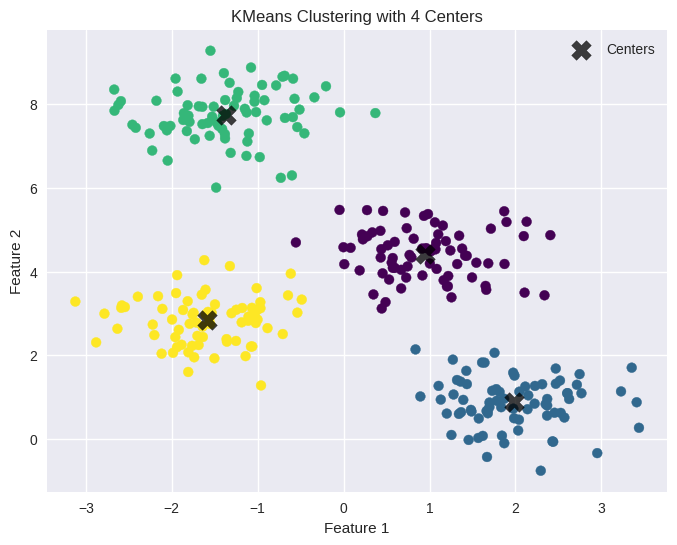

In [1]:
'''
6. Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.
'''

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


plt.style.use('seaborn-v0_8')
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, marker='X', label='Centers')

plt.title("KMeans Clustering with 4 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [2]:
'''
7. Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).
'''
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np


data = load_wine()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)

Number of clusters found (excluding noise): 0


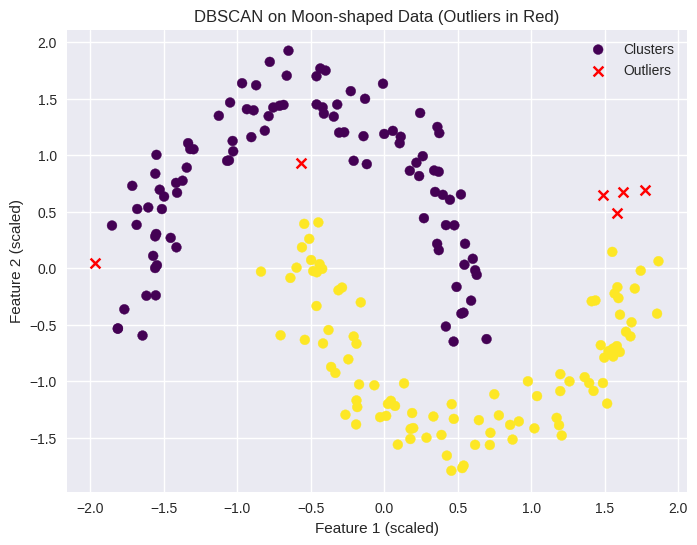

In [3]:
'''
8.Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.
'''
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)


plt.figure(figsize=(8, 6))

plt.scatter(X_scaled[labels != -1, 0], X_scaled[labels != -1, 1],
            c=labels[labels != -1], cmap='viridis', s=50, label='Clusters')

plt.scatter(X_scaled[labels == -1, 0], X_scaled[labels == -1, 1],
            c='red', s=50, marker='x', label='Outliers')

plt.title("DBSCAN on Moon-shaped Data (Outliers in Red)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.show()

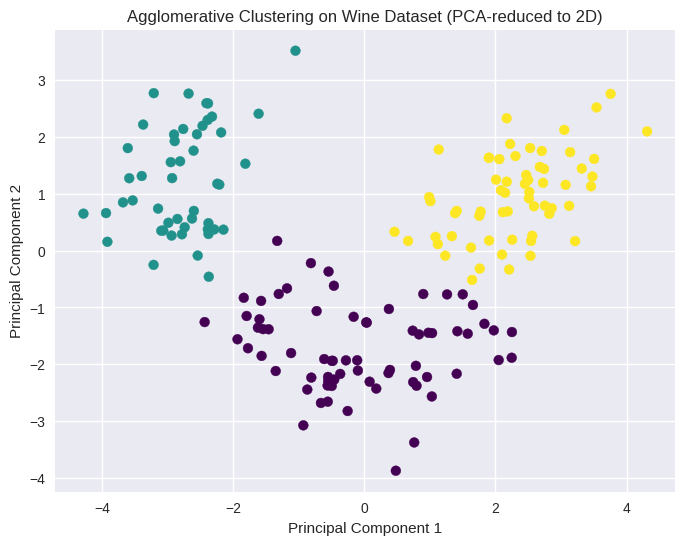

In [5]:
'''
9.Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.
'''

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

data = load_wine()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

agg_cluster = AgglomerativeClustering(n_clusters=3)
labels = agg_cluster.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on Wine Dataset (PCA-reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

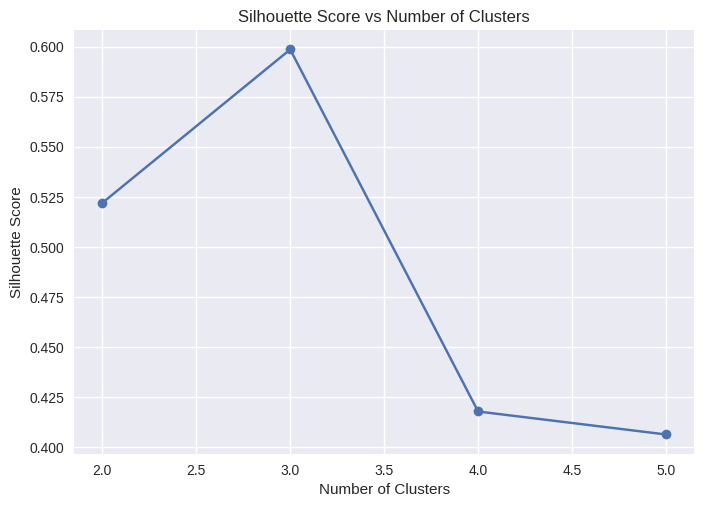

Optimal number of clusters: 3
   CustomerID  Age  Income  Category_A_Spend  Category_B_Spend  \
0           1   25   30000               200                50   
1           2   34   45000               500               200   
2           3   45   60000              1000               300   
3           4   23   25000               150                40   
4           5   52   80000              1200               400   
5           6   40   52000               800               250   
6           7   36   48000               600               220   
7           8   29   31000               300               100   
8           9   48   75000              1100               350   
9          10   33   47000               700               180   

   Category_C_Spend  Cluster  
0                80        0  
1               150        1  
2               400        2  
3                60        0  
4               500        2  
5               300        1  
6               200       

In [8]:
'''
10.
You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?
'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

data = {
    "CustomerID": range(1, 11),
    "Age": [25, 34, 45, 23, 52, 40, 36, 29, 48, 33],
    "Income": [30000, 45000, 60000, 25000, 80000, 52000, 48000, 31000, 75000, 47000],
    "Category_A_Spend": [200, 500, 1000, 150, 1200, 800, 600, 300, 1100, 700],
    "Category_B_Spend": [50, 200, 300, 40, 400, 250, 220, 100, 350, 180],
    "Category_C_Spend": [80, 150, 400, 60, 500, 300, 200, 120, 450, 250]
}

df = pd.DataFrame(data)

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(df.drop(columns=["CustomerID"]))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

sil_scores = []
K_range = range(2, 6)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.plot(K_range, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

best_k = K_range[np.argmax(sil_scores)]
print("Optimal number of clusters:", best_k)


kmeans = KMeans(n_clusters=best_k, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print(df)


cluster_profile = df.groupby("Cluster").mean()
print("\nCluster Profiles:\n", cluster_profile)